In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline 

# Удаление дубликатов в данных

In [3]:
data = pd.DataFrame({"k1": ["one", "two"] * 3 + ["two"], "k2": [1, 1, 2, 3, 3, 4, 4], 
                     "k3": [1, 1, 2, 3, 3, 4, 4], "k4":[1, 1, 1, 1, 1, 1, 1]})
data

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1
6,two,4,4,1


In [4]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [5]:
data.drop_duplicates() #удаление повторяющихся строк

,k1,k2,k3,k4
0,one,1,1,1
1,two,1,1,1
2,one,2,2,1
3,two,3,3,1
4,one,3,3,1
5,two,4,4,1


In [6]:
data.T.drop_duplicates().T #удаление повторяющихся колонок

,k1,k2,k4
0,one,1,1
1,two,1,1
2,one,2,1
3,two,3,1
4,one,3,1
5,two,4,1
6,two,4,1


In [7]:
data.drop(data.columns[data.nunique() == 1], axis=1) #удаление колонок, где столбец состоит полностью из одного уникального значения,

,k1,k2,k3
0,one,1,1
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,3
5,two,4,4
6,two,4,4


# Заполнение пропусков в данных

Nan - маркер отсутствия данных.

In [8]:
float_data = pd.Series([1.2, -3.5, np.nan, 0])
float_data

0    1.2
1   -3.5
2    NaN
3    0.0
dtype: float64

In [9]:
float_data.isna()

0    False
1    False
2     True
3    False
dtype: bool

In [10]:
float_data.notna()

0     True
1     True
2    False
3     True
dtype: bool

Удаление данных с пропусками

In [11]:
data = pd.DataFrame([[1., 6.5, 3., np.nan], [1., np.nan, np.nan, np.nan], [np.nan, np.nan, np.nan, np.nan], 
                     [np.nan, 6.5, 3., np.nan]])
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [12]:
data.dropna()

,0,1,2,3


In [13]:
data.dropna(how="all") #удаляем строки где везде нули

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [14]:
data.dropna(axis="columns", how="all")

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [15]:
data.dropna(thresh=2)

,0,1,2,3
0,1.0,6.5,3.0,NaN
3,NaN,6.5,3.0,NaN


Восполнение отсутствующих данных

In [16]:
df = pd.DataFrame(np.random.standard_normal((7, 3)))
df.iloc[:4, 1] = np.nan
df.iloc[:2, 2] = np.nan
df

,0,1,2
0,-0.771822,NaN,NaN
1,-0.084461,NaN,NaN
2,0.331044,NaN,0.529051
3,-0.779628,NaN,1.093796
4,-0.862770,0.382632,0.590227
5,0.933531,-0.742438,-0.454874
6,1.184478,0.556151,-0.034427


In [17]:
df.fillna(0)

,0,1,2
0,-0.771822,0.000000,0.000000
1,-0.084461,0.000000,0.000000
2,0.331044,0.000000,0.529051
3,-0.779628,0.000000,1.093796
4,-0.862770,0.382632,0.590227
5,0.933531,-0.742438,-0.454874
6,1.184478,0.556151,-0.034427


In [18]:
df.fillna({1: 0.5, 2: 0}) #засунули словарь по значениям

,0,1,2
0,-0.771822,0.500000,0.000000
1,-0.084461,0.500000,0.000000
2,0.331044,0.500000,0.529051
3,-0.779628,0.500000,1.093796
4,-0.862770,0.382632,0.590227
5,0.933531,-0.742438,-0.454874
6,1.184478,0.556151,-0.034427


In [19]:
df.fillna(method="bfill") #заполнение по предыдущими значению

,0,1,2
0,-0.771822,0.382632,0.529051
1,-0.084461,0.382632,0.529051
2,0.331044,0.382632,0.529051
3,-0.779628,0.382632,1.093796
4,-0.862770,0.382632,0.590227
5,0.933531,-0.742438,-0.454874
6,1.184478,0.556151,-0.034427


In [20]:
df.fillna(method="bfill", limit=2)

,0,1,2
0,-0.771822,NaN,0.529051
1,-0.084461,NaN,0.529051
2,0.331044,0.382632,0.529051
3,-0.779628,0.382632,1.093796
4,-0.862770,0.382632,0.590227
5,0.933531,-0.742438,-0.454874
6,1.184478,0.556151,-0.034427


In [21]:
df.fillna(data.mean()) #заполнение пропусков средними

,0,1,2
0,-0.771822,6.500000,3.000000
1,-0.084461,6.500000,3.000000
2,0.331044,6.500000,0.529051
3,-0.779628,6.500000,1.093796
4,-0.862770,0.382632,0.590227
5,0.933531,-0.742438,-0.454874
6,1.184478,0.556151,-0.034427


In [22]:
df.fillna(data.median()) #заполнение пропусков медианой

,0,1,2
0,-0.771822,6.500000,3.000000
1,-0.084461,6.500000,3.000000
2,0.331044,6.500000,0.529051
3,-0.779628,6.500000,1.093796
4,-0.862770,0.382632,0.590227
5,0.933531,-0.742438,-0.454874
6,1.184478,0.556151,-0.034427


Медиана более устойчива к выбросам

In [23]:
data_all = []
for i in range(1000):
    data = []
    for i in range(1000):
        if np.random.random() >= 0.90:
            data.append(np.random.normal(1, 1, 1)[0])
        else:
            data.append(np.random.normal(1, 10, 1)[0])
    data_all.append(data)
    
data_all = np.array(data_all)

<AxesSubplot:>

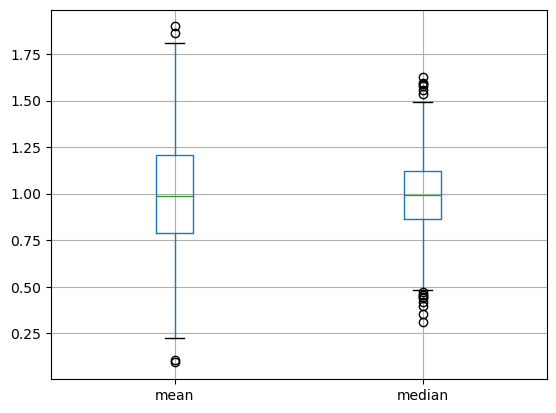

In [24]:
res = pd.DataFrame({"mean": data_all.mean(axis=1), "median": np.median(data_all, axis=1)})
res.boxplot()

Создание дополнительного признака

In [25]:
#как мы ещё можем разотать с пропусками - создаём доп признак
df["2 is nan"] = df[2].isna().astype(np.int32)
df

,0,1,2,2 is nan
0,-0.771822,NaN,NaN,1
1,-0.084461,NaN,NaN,1
2,0.331044,NaN,0.529051,0
3,-0.779628,NaN,1.093796,0
4,-0.862770,0.382632,0.590227,0
5,0.933531,-0.742438,-0.454874,0
6,1.184478,0.556151,-0.034427,0


Замена значений

In [26]:
data = pd.Series([1., -999., 2., -999., 4., 3.]) #-999 - явно выброс
data

0      1.0
1   -999.0
2      2.0
3   -999.0
4      4.0
5      3.0
dtype: float64

In [27]:
data.replace(-999, np.nan) #переводим в нан, дальше работаем как описано выше

0    1.0
1    NaN
2    2.0
3    NaN
4    4.0
5    3.0
dtype: float64

# Кодирование признаков

Бинарные факторы: False == 0, True == 1

In [28]:
data = pd.Series(["male"]*10 + ["female"]*5) 
data

0       male
1       male
2       male
3       male
4       male
5       male
6       male
7       male
8       male
9       male
10    female
11    female
12    female
13    female
14    female
dtype: object

In [29]:
(data == "male").astype(np.int32)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    0
11    0
12    0
13    0
14    0
dtype: int32

Категориальные факторы: разбиваем по порядку


In [30]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

df = pd.DataFrame(["moscow", "spb", "moscow", "spb", "spb", "spb", "tomsk", "novgorod", "samara", "saratov"])
df

,0
0,moscow
1,spb
2,moscow
3,spb
4,spb
5,spb
6,tomsk
7,novgorod
8,samara
9,saratov


In [31]:
enc = OrdinalEncoder() #пусть москва это 1, саратов это 10, такой метод используют тогда, когда есть какая-то упорядоченность признаков
enc.fit_transform(df)

array([[0.],
       [4.],
       [0.],
       [4.],
       [4.],
       [4.],
       [5.],
       [1.],
       [2.],
       [3.]])

Категориальные факторы: разбиваем на много бинарных (one hot encoding)

city_is_moscow: 0/1, city_is_spb: 0/1, city_is_tomsk: 0/1 ... 

In [32]:
ohe = OneHotEncoder()
ohe.fit(df)
ohe.categories_

[array(['moscow', 'novgorod', 'samara', 'saratov', 'spb', 'tomsk'],
       dtype=object)]

In [33]:
pd.DataFrame(ohe.transform(df).toarray(), columns=ohe.categories_)

,moscow,novgorod,samara,saratov,spb,tomsk
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,1.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
pd.get_dummies(df)

,0_moscow,0_novgorod,0_samara,0_saratov,0_spb,0_tomsk
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0
5,0,0,0,0,1,0
6,0,0,0,0,0,1
7,0,1,0,0,0,0
8,0,0,1,0,0,0
9,0,0,0,1,0,0


Цикличные факторы: время дня => позиция на циферблате => sin, cos угла

# Создание новых признаков

Полиномиальные признаки

In [35]:
from sklearn.preprocessing import PolynomialFeatures #создаёт массив под полином

In [36]:
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [37]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

Другие преобразования: sin x, ln x

Дискретизация и группировка по интервалам

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

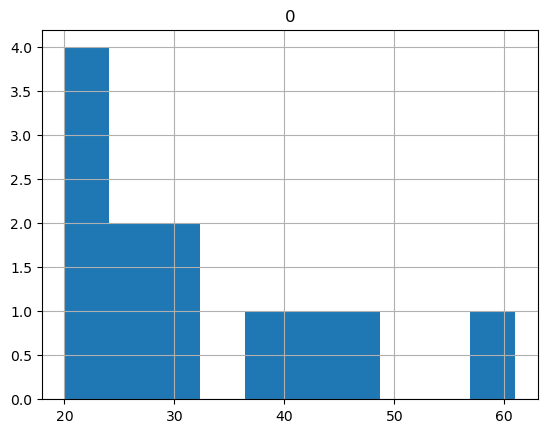

In [38]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]
pd.DataFrame(ages).hist()

In [39]:
bins = [18, 25, 35, 60, 100]
age_categories = pd.cut(ages, bins)
age_categories

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64, right]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [40]:
age_categories.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

# Преобразование данных

Приведение к единой шкале: StandardScaler, MinMaxScaler

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [42]:
scaler = StandardScaler()
scaler.fit_transform(data)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

Логарифмирование, преобразование Бокса-Кокса

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

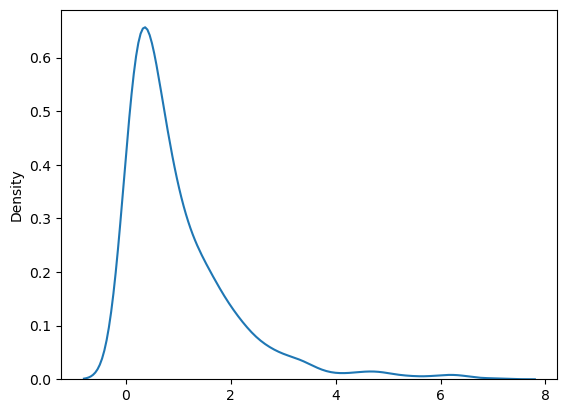

In [43]:
from scipy. stats import boxcox 

data = np.random.exponential(size= 1000)
sns.distplot(data, hist= False, kde= True)
#распредление напомнинает нормальное, но немного скошенноке

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

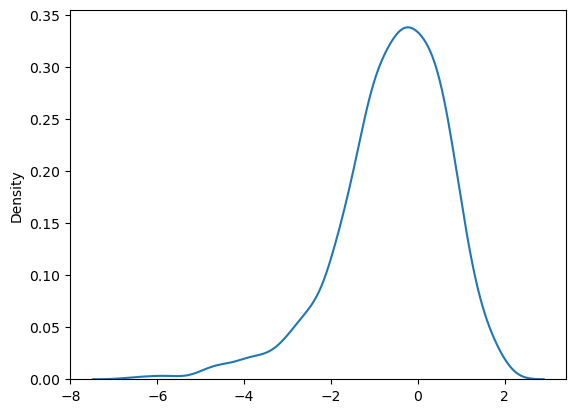

In [44]:
transformed_data = np.log(data) 
sns.distplot(transformed_data, hist=False, kde=True)
#логарфмирование

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

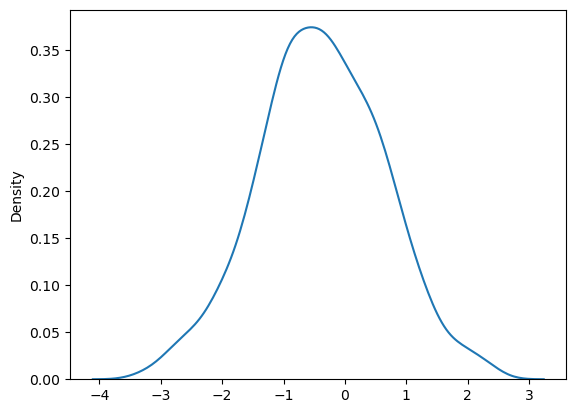

In [45]:
transformed_data, best_lambda = boxcox(data) 

sns.distplot(transformed_data, hist=False , kde=True)
#преобразование Бокса-Кокса, с помощью метода макси максимального правдоподобия подбирается лямбда (x^лямбда - 1)/лямбда 
#если х не равен 0, а если равен то lnx

In [46]:
best_lambda

0.2354114931342291

# Домашнее задание

In [47]:
data = pd.read_csv("https://raw.githubusercontent.com/katarina74/ml_lessons/main/lesson_2/data/techparams_train.csv")

In [48]:
data.head(3)

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
0,0,9,-1.0,36457,9.0,4.3,0,3,4,2006,...,1,2,13,40.0,2018.0,16,3,0,1,2360
1,2,3,-1.0,44872,8.0,-1.0,3,7,4,1982,...,4,2,13,108.0,1993.0,34,3,0,1,3060
2,4,3,-1.0,55927,16.0,4.2,0,4,5,2014,...,4,2,13,55.0,2019.0,35,3,0,1,2648


Данные: технические характеристики разных конфигураций автомобилей

Таргет: длина колесной базы конфигурации (в миллиметрах).

# Предобработка признаков

In [49]:
data.shape

(43245, 32)

In [50]:
data.info() #нулевых значений нет, в этом плане всё в порядке.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43245 entries, 0 to 43244
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           43245 non-null  int64  
 1   back-suspension                 43245 non-null  int64  
 2   battery-capacity                43245 non-null  float64
 3   charge-time                     43245 non-null  int64  
 4   compression                     43245 non-null  float64
 5   consumption-mixed               43245 non-null  float64
 6   cylinders-order                 43245 non-null  int64  
 7   cylinders-value                 43245 non-null  int64  
 8   engine-feeding                  43245 non-null  int64  
 9   engine-start                    43245 non-null  int64  
 10  engine-stop                     43245 non-null  int64  
 11  engine-type                     43245 non-null  int64  
 12  gear-type                       

In [51]:
data.describe()

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target
count,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,...,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000,43245.000000
mean,30663.219933,4.273511,-0.875116,30684.557267,8.970296,4.290234,0.628512,4.576506,3.756481,1999.358377,...,3.049370,1.867014,12.964828,53.300937,1790.357267,18.434177,2.991421,0.002035,4.474783,2660.826246
std,17666.118635,2.929769,2.904357,17562.733960,6.148230,4.765435,1.230331,1.161683,1.720373,13.433605,...,1.375937,0.350225,4.499009,24.845687,616.347148,9.541600,0.142150,0.045065,39.934808,236.315583
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,1904.000000,...,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1190.000000
25%,15455.000000,3.000000,-1.000000,15578.000000,8.500000,-1.000000,0.000000,4.000000,4.000000,1991.000000,...,1.000000,2.000000,13.000000,46.000000,1992.000000,10.000000,3.000000,0.000000,1.000000,2510.000000
50%,30632.000000,3.000000,-1.000000,30756.000000,9.800000,5.400000,0.000000,4.000000,4.000000,2001.000000,...,4.000000,2.000000,13.000000,58.000000,2002.000000,16.000000,3.000000,0.000000,1.000000,2640.000000
75%,45951.000000,8.000000,-1.000000,45793.000000,10.800000,8.000000,0.000000,6.000000,5.000000,2010.000000,...,4.000000,2.000000,13.000000,68.000000,2011.000000,26.000000,3.000000,0.000000,1.000000,2774.000000
max,61228.000000,10.000000,200.000000,61175.000000,23.500000,40.000000,6.000000,10.000000,8.000000,2021.000000,...,4.000000,2.000000,35.000000,166.000000,2021.000000,36.000000,3.000000,1.000000,658.000000,5885.000000


In [52]:
data[data.duplicated(['index'])] #явных дубликатов по индексу нет

,index,back-suspension,battery-capacity,charge-time,compression,consumption-mixed,cylinders-order,cylinders-value,engine-feeding,engine-start,...,configurations_front-brake,configurations_safety-rating,configurations_seats,configurations_tank-volume,supergen_year-stop,models_country-from,models_group,models_light-and-commercial,models_male,target


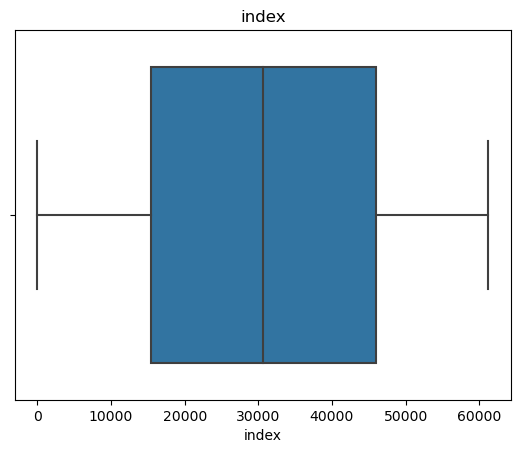

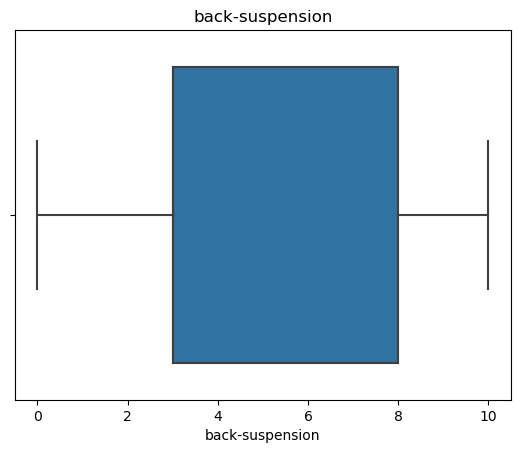

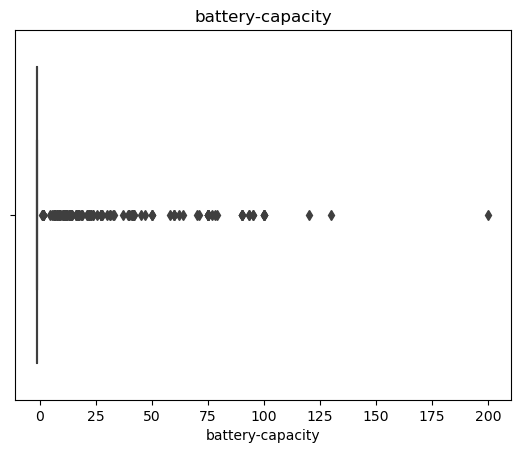

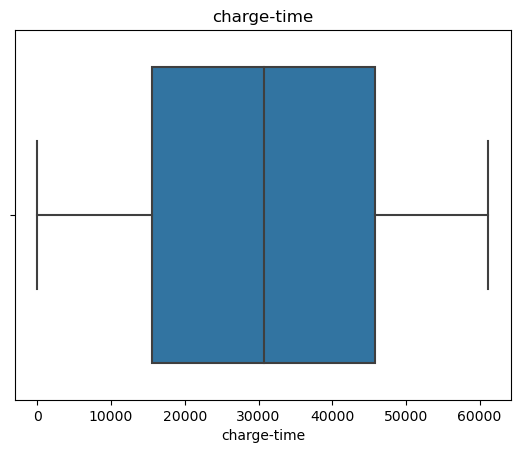

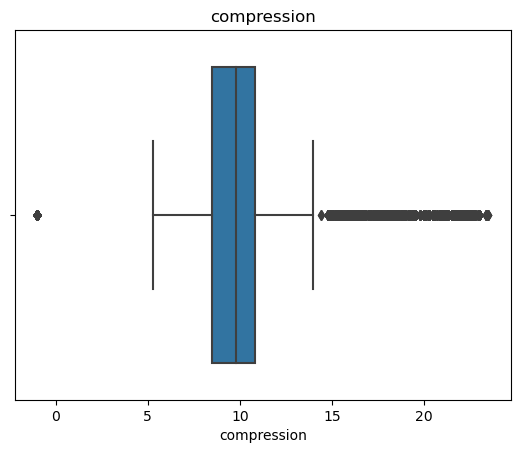

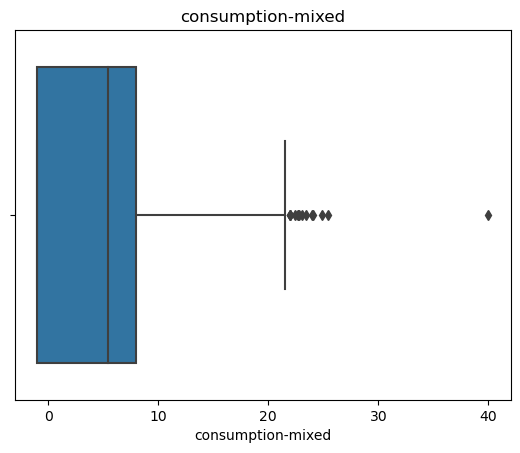

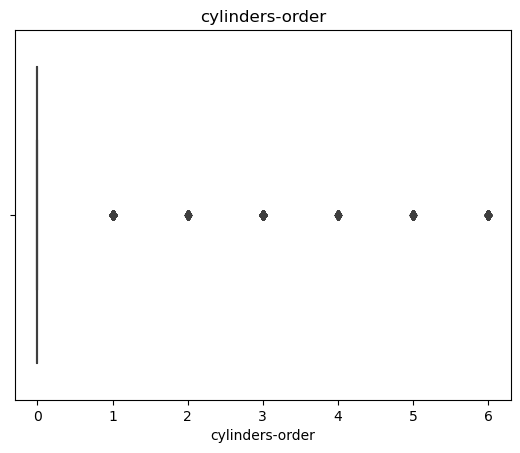

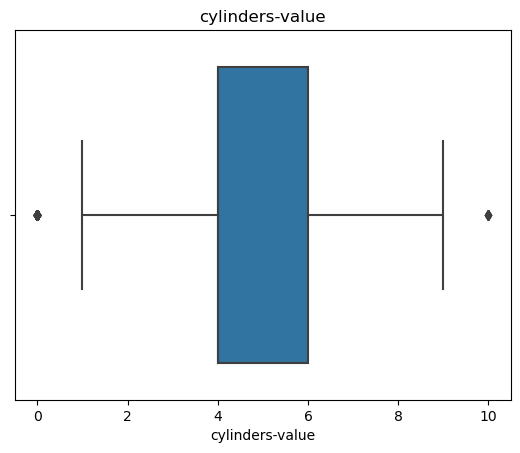

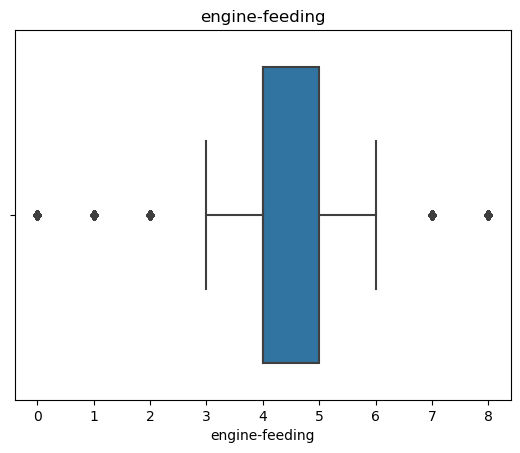

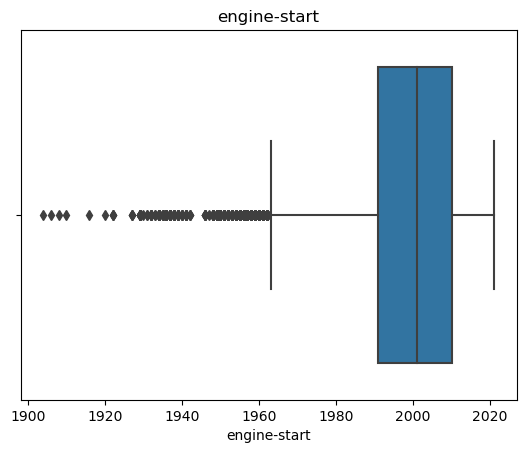

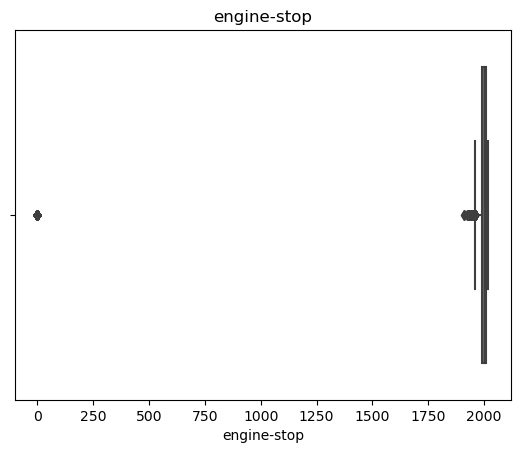

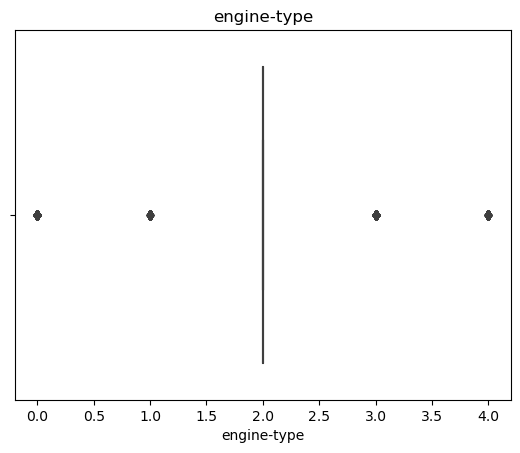

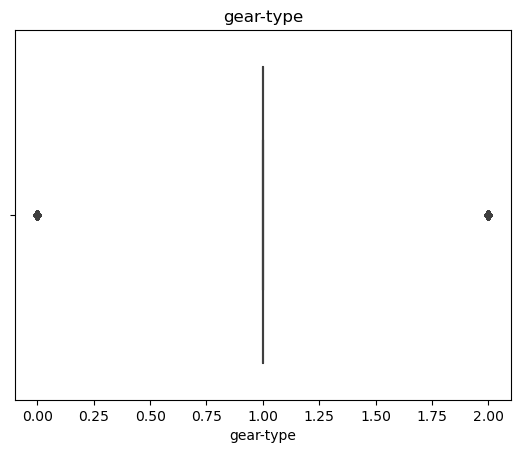

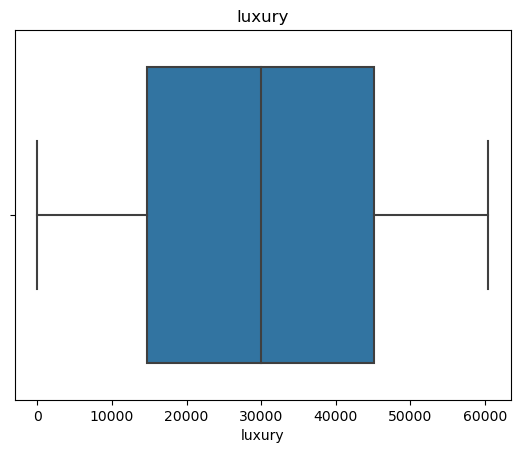

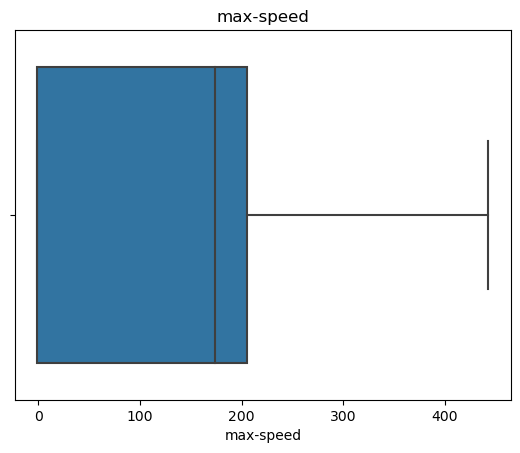

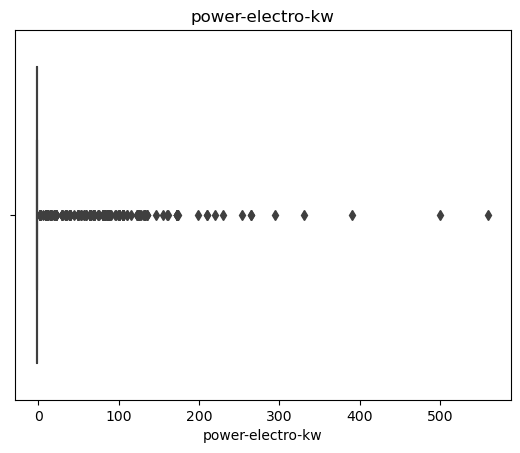

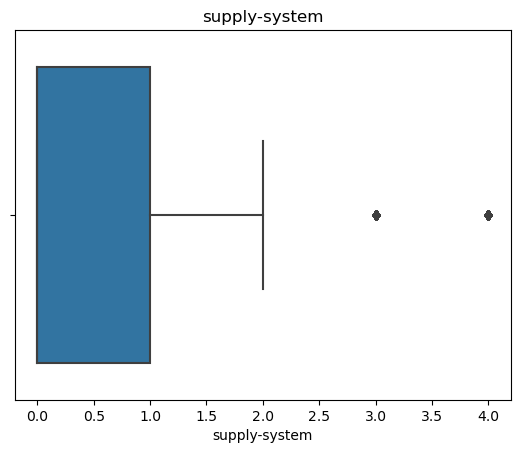

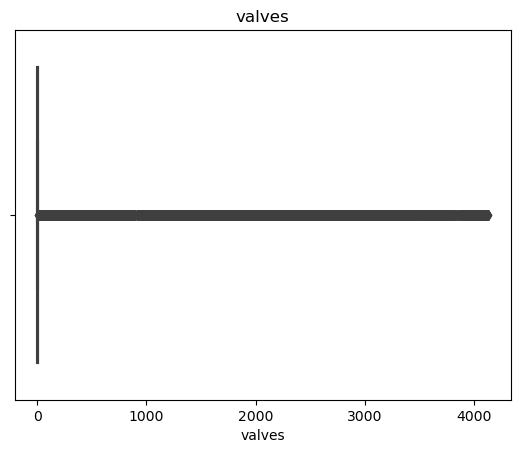

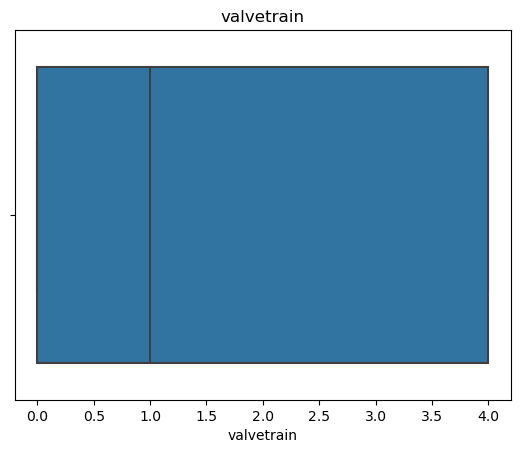

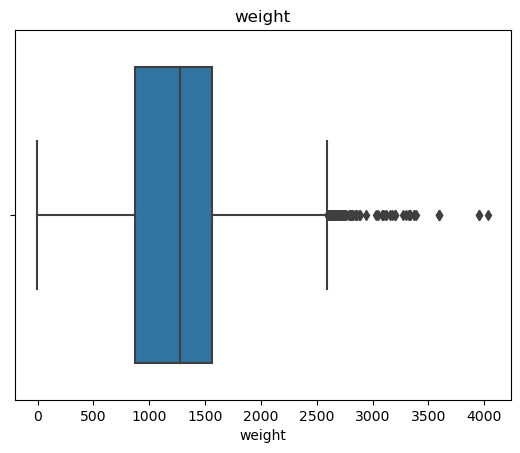

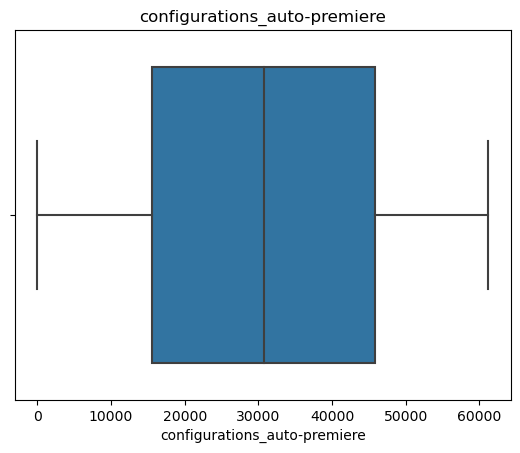

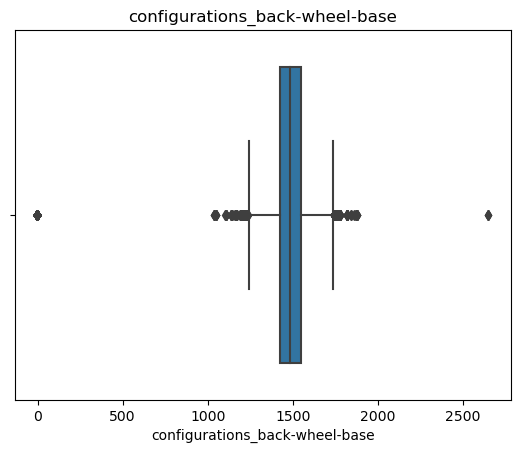

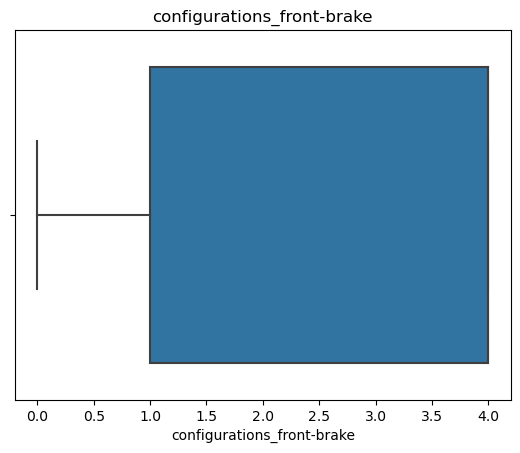

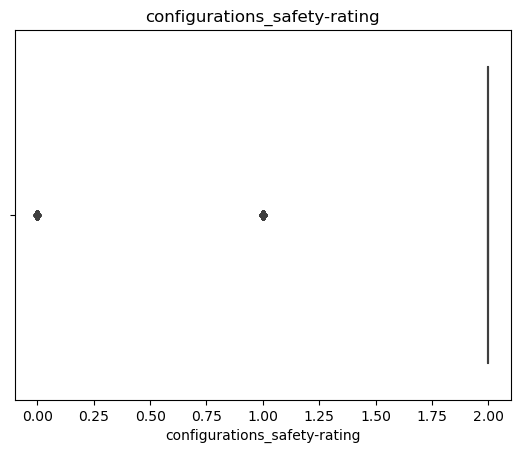

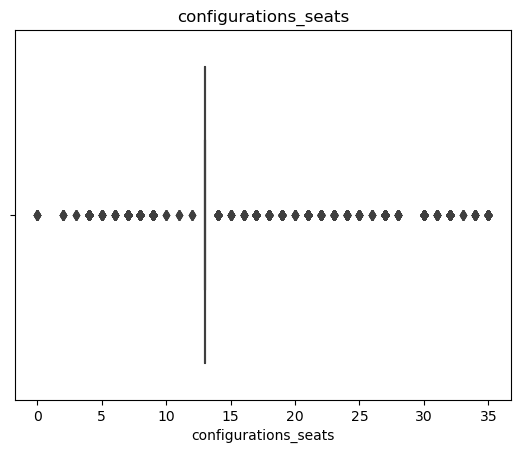

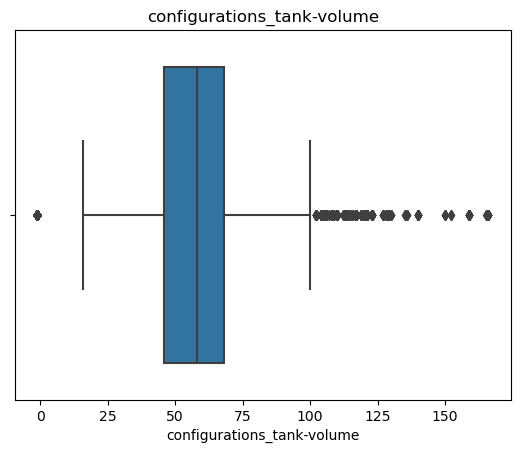

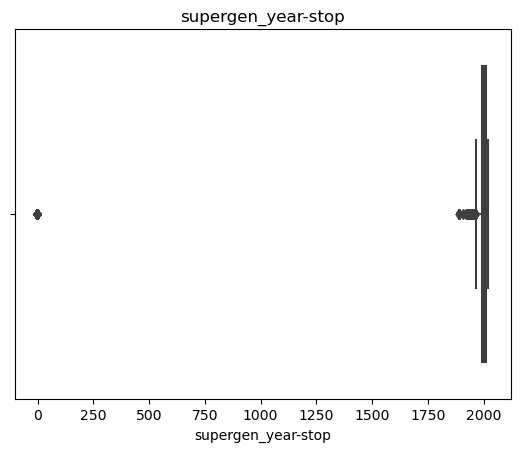

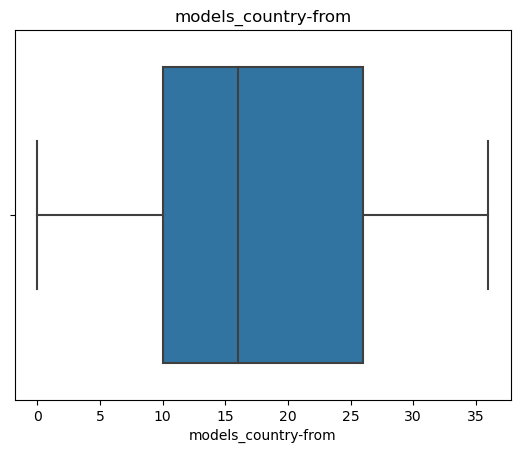

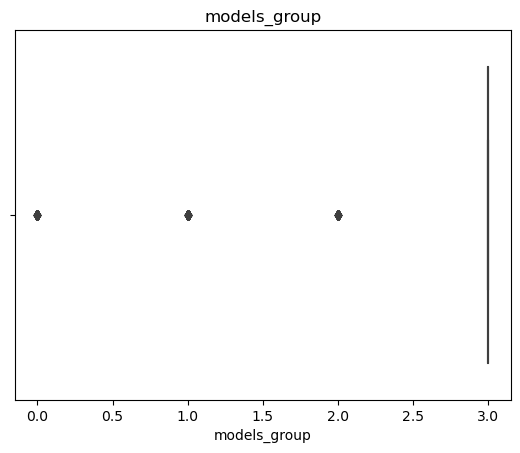

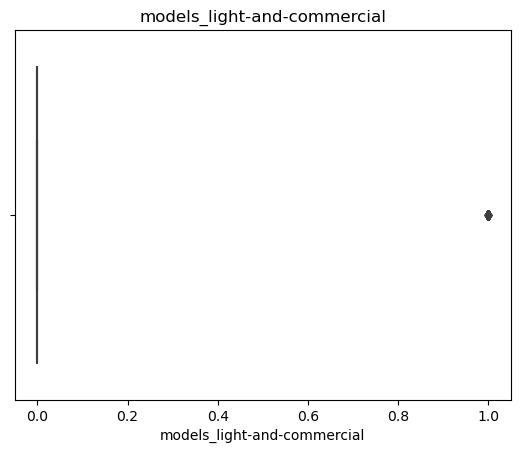

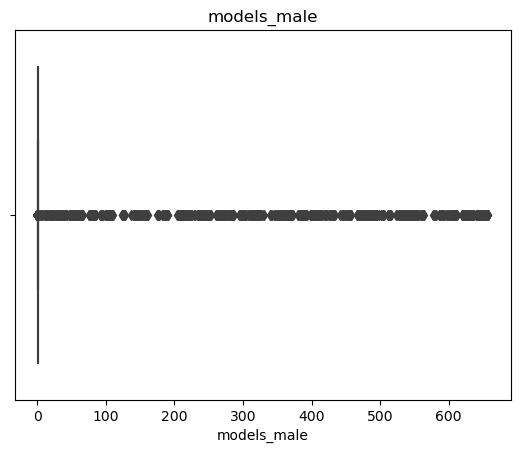

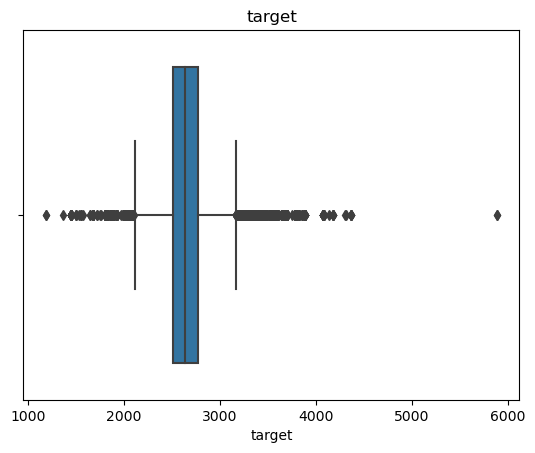

In [53]:
for elements in data.columns:
    sns.boxplot(x=elements, data=data)
    plt.title(elements)
    plt.show()

#траблы с battery-capacity, compression,consumption-mixed,cylinders-order, cylinders-value, engine-feeding, engine-start
#engine-stop, engine-type, gear-type, power-electro-kw, supply-system, valves, weight, configurations_back-wheel-base
#configuations_safety-rating, configurations_seats, configuations_tank-volume, supergen_year-stop, models_group, models_light-and-commercial
#models_male, target


А может вообще многие факторы с друг другом коррелируют и нет смысла добавлять их все, просто как-то чересчур их много

<AxesSubplot:>

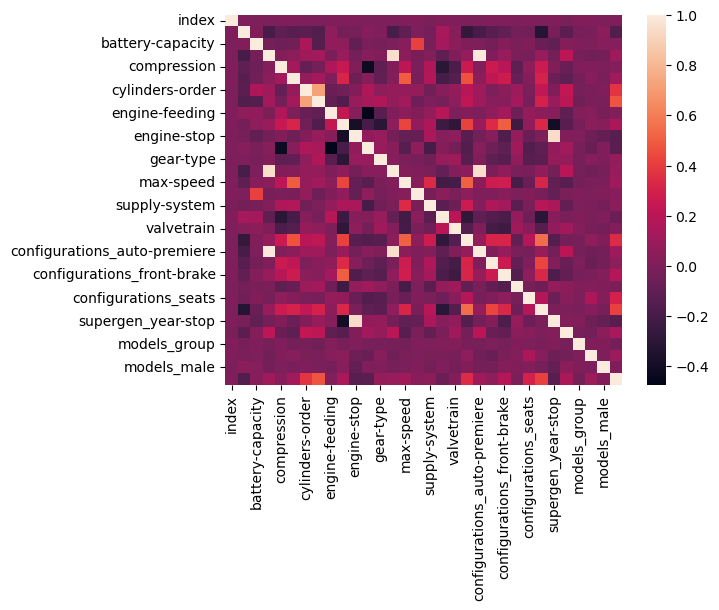

In [54]:
sns.heatmap(data.corr()) 
# оставляем только те факторы, которые сильно коррелируют с целевой переменной, остальные исключаем, чтоб не было мультиколлениарности

In [55]:
w = data.corr()['target']
w = w.to_frame()

In [57]:
w.sort_values(by='target', ascending=False)
# оставляем cylinders-value, configurations_tank-volume, cylinders-order, weight, configurations_seats

,target
target,1.000000
cylinders-value,0.472177
configurations_tank-volume,0.413853
cylinders-order,0.376272
weight,0.339835
configurations_seats,0.298625
configurations_front-brake,0.184791
engine-start,0.150944
models_country-from,0.148848
consumption-mixed,0.118195


In [58]:
df = data[['cylinders-value', 'configurations_tank-volume', 'cylinders-order', 'weight', 'configurations_seats','target']]

In [59]:
df.corr()

,cylinders-value,configurations_tank-volume,cylinders-order,weight,configurations_seats,target
cylinders-value,1.000000,0.302997,0.720077,0.220476,-0.028327,0.472177
configurations_tank-volume,0.302997,1.000000,0.224373,0.546153,0.185502,0.413853
cylinders-order,0.720077,0.224373,1.000000,0.199547,-0.014392,0.376272
weight,0.220476,0.546153,0.199547,1.000000,0.180505,0.339835
configurations_seats,-0.028327,0.185502,-0.014392,0.180505,1.000000,0.298625
target,0.472177,0.413853,0.376272,0.339835,0.298625,1.000000


cylinders-order и cylinders-value под вопросом. Оставляем cylinders-value, так каку него корреляция с целевым фактором сильнее

In [60]:
df = df[['cylinders-value', 'configurations_tank-volume', 'weight', 'configurations_seats','target']]

<AxesSubplot:>

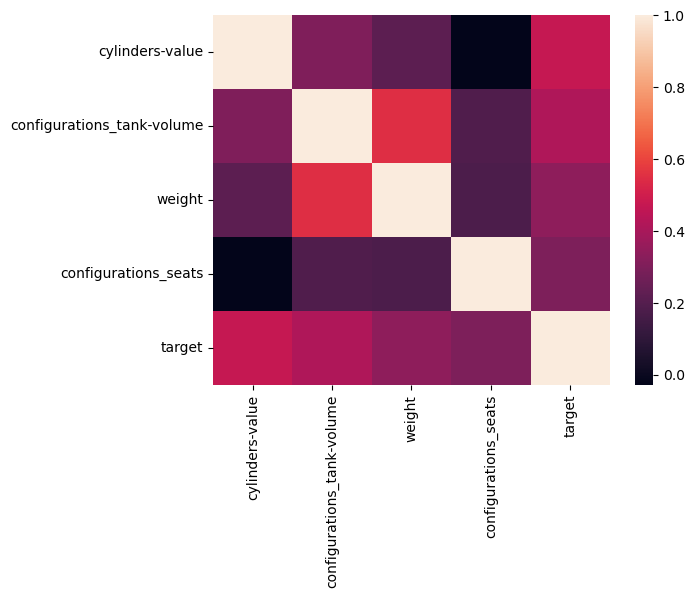

In [62]:
sns.heatmap(df.corr())

In [63]:
df

,cylinders-value,configurations_tank-volume,weight,configurations_seats,target
0,3,40.0,820.0,13,2360
1,7,108.0,2350.0,13,3060
2,4,55.0,1350.0,13,2648
3,4,55.0,1090.0,13,2513
4,4,62.0,1410.0,13,2703
...,...,...,...,...,...
43240,4,47.0,-1.0,13,2510
43241,4,65.0,1545.0,13,2808
43242,4,55.0,1210.0,13,2520
43243,5,70.0,1660.0,13,2755


In [185]:
#cylinders-value - объём цилиндра
#Volume Tank Configurations - Конфигурации объемных резервуаров
#weight - вес
#configurations_seats - конфигурация кресел
#длина колесной базы конфигурации (в миллиметрах).

In [64]:
df['cylinders-value'].value_counts()

4     28946
6      7587
7      3233
3      1863
5      1016
9       278
2       142
0       105
8        57
1        13
10        5
Name: cylinders-value, dtype: int64

In [69]:
df['configurations_tank-volume'].value_counts().index <0 
# конфигурация объёмных резерваров -1???
#заменим все медианой

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [66]:
df['configurations_tank-volume']= df['configurations_tank-volume'].replace(-1, df['configurations_tank-volume'].median())

In [70]:
df['weight'].value_counts()
#вес отрицательное число, причём таких значений просто аномальное количество, ошибка?

1279.0    9415
1320.0     257
1280.0     248
1430.0     248
1090.0     247
          ... 
542.0        1
2072.0       1
2327.0       1
2471.0       1
2321.0       1
Name: weight, Length: 1609, dtype: int64

In [71]:
df['weight']= df['weight'].replace(-1, df['weight'].median())

In [191]:
df['configurations_seats'].value_counts() 
#страная машина, где вообще нет сидений.....

13    31130
8      5202
4      1648
17     1401
27     1131
9       517
32      341
21      279
7       239
30      185
14      174
35      153
19      143
18      120
22      100
23       94
24       72
25       39
28       38
16       37
5        31
31       30
6        29
34       29
15       22
20       12
0        10
2         9
26        9
33        5
10        4
3         4
11        4
12        4
Name: configurations_seats, dtype: int64

In [ ]:
#мне кажется, что тут было бы классно создать новый признак для сидений, создать какие-то интервалы и считать, сколько наблюдений попало в эти интервалы

<AxesSubplot:>

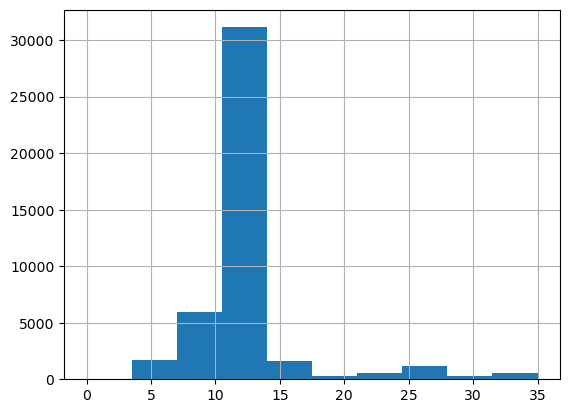

In [72]:
df['configurations_seats'].hist()

In [73]:
categories = ['до 14', '13-15', 'более 15']

In [75]:
df['target'].value_counts()

2700    959
2600    951
2760    811
2650    693
2400    688
       ... 
3752      1
2108      1
1365      1
2603      1
2025      1
Name: target, Length: 759, dtype: int64

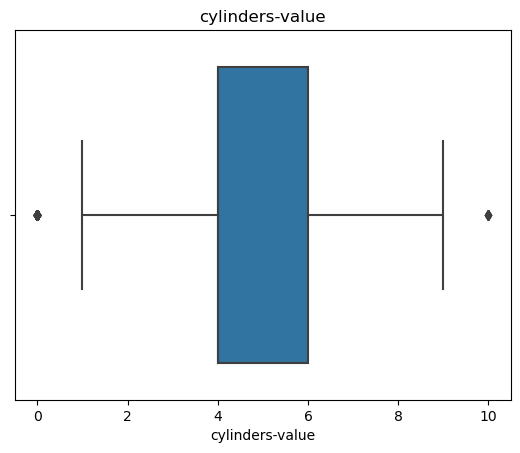

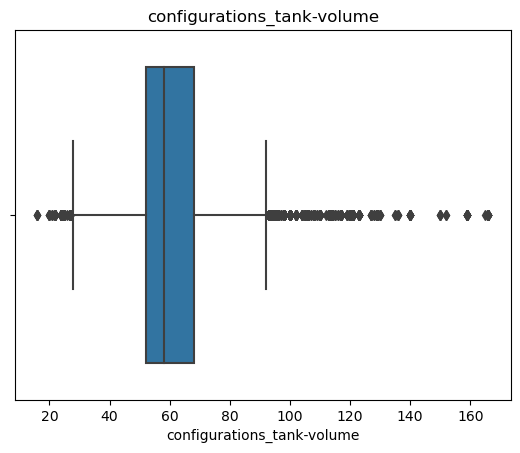

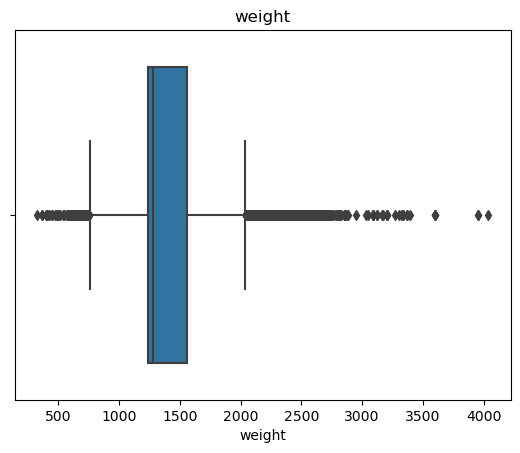

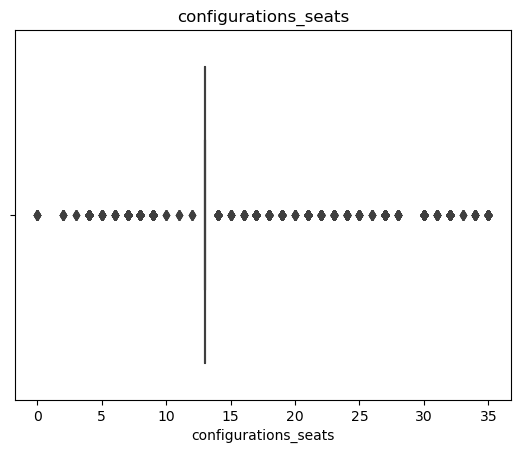

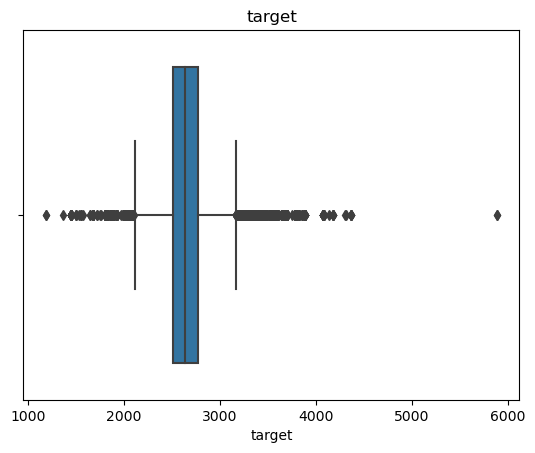

In [77]:
for elements in df.columns:
    sns.boxplot(x=elements, data=df)
    plt.title(elements)
    plt.show()

In [81]:
def ejection (col):
    q75 = np.percentile(col, 75)
    q25 = np.percentile(col, 25)
    iqr = q75 - q25
    ejection_h = q75 + 1.5*iqr
    ejection_l = q25 - 1.5*iqr
    ejection_count = col[(col > ejection_h) | (col < ejection_l)].count()
    ejection_perc = (ejection_count/len(col))*100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [82]:
ejection(df['cylinders-value']) #норм, удаляем выбросы

(9.0, 1.0, 110, 0.25436466643542605)

In [83]:
ejection(df['configurations_tank-volume']) #норм, удаляем выбросы

(92.0, 28.0, 1367, 3.1610590819747952)

In [84]:
ejection(df['weight']) # не норм, удалять нельзя

(2040.0, 760.0, 2410, 5.572898600994335)

In [85]:
ejection(df['configurations_seats']) #тут надо думать

(13.0, 13.0, 12115, 28.014799398774425)

In [86]:
ejection(df['target'])#норм, удаляем выбросы

(3170.0, 2114.0, 1694, 3.917215863105562)

In [89]:
good_df = df[(df['cylinders-value'] < ejection(df['cylinders-value'])[0]) & (df['cylinders-value'] > ejection(df['cylinders-value'])[1])]
good_df = good_df.reset_index(drop=True)
good_df.head(3)

,cylinders-value,configurations_tank-volume,weight,configurations_seats,target
0,3,40.0,820.0,13,2360
1,7,108.0,2350.0,13,3060
2,4,55.0,1350.0,13,2648


In [90]:
good_good_df = good_df[(good_df['target'] < ejection(good_df['target'])[0]) & (good_df['target'] > ejection(good_df['target'])[1])]
good_good_df = good_good_df.reset_index(drop=True)
good_good_df.head(3)

,cylinders-value,configurations_tank-volume,weight,configurations_seats,target
0,3,40.0,820.0,13,2360
1,7,108.0,2350.0,13,3060
2,4,55.0,1350.0,13,2648


In [91]:
good_good_df = df

In [93]:
good_df = df[(df['configurations_tank-volume'] < ejection(df['configurations_tank-volume'])[0]) & (df['configurations_tank-volume'] > ejection(df['configurations_tank-volume'])[1])]
good_df = good_df.reset_index(drop=True)
good_df.head(3)

,cylinders-value,configurations_tank-volume,weight,configurations_seats,target
0,3,40.0,820.0,13,2360
1,4,55.0,1350.0,13,2648
2,4,55.0,1090.0,13,2513


D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='weight', ylabel='Density'>

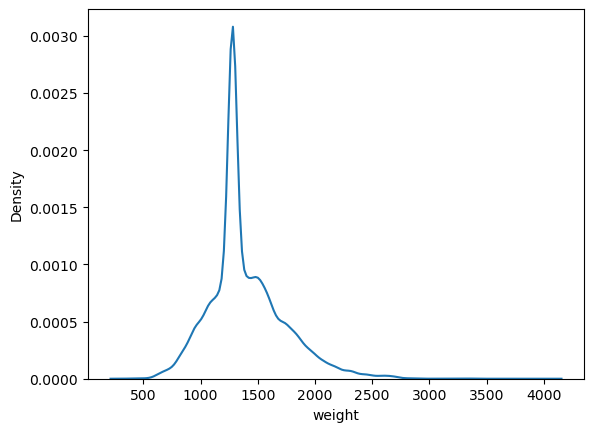

In [94]:
sns.distplot(df['weight'], hist=False, kde=True)

In [95]:
good_df = df

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

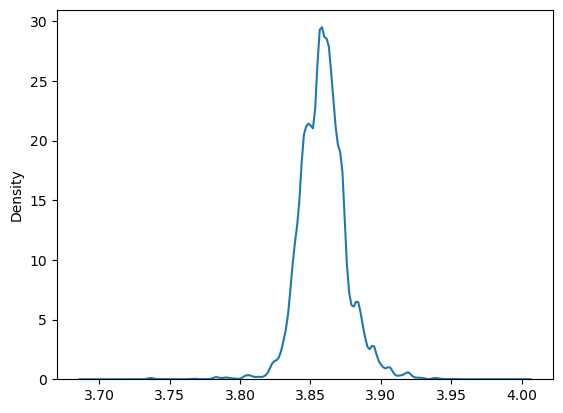

In [96]:
transformed_data, best_lambda = boxcox(df['target']) 
sns.distplot(transformed_data, hist=False , kde=True)

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

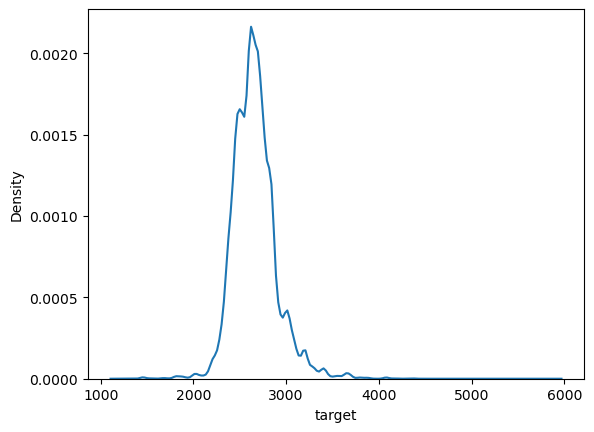

In [97]:
sns.distplot(df['target'], hist=False, kde=True)

D:\papka\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='configurations_seats', ylabel='Density'>

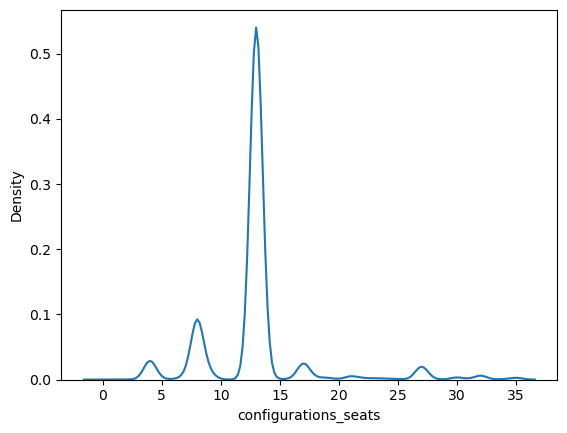

In [211]:
sns.distplot(lipsi_ha['configurations_seats'], hist=False, kde=True)

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='configurations_tank-volume', ylabel='Density'>

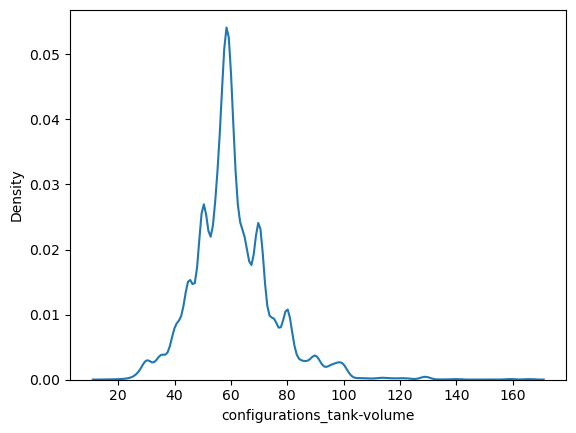

In [98]:
sns.distplot(df['configurations_tank-volume'], hist=False, kde=True)

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

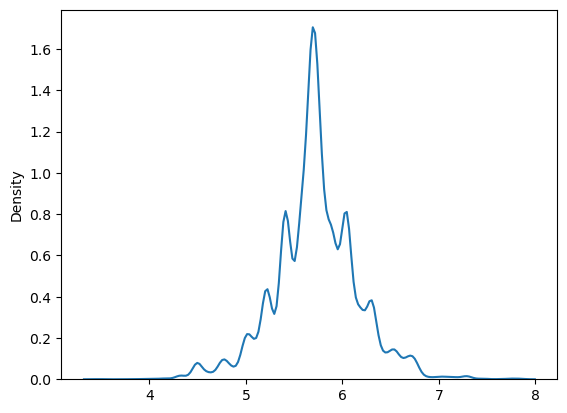

In [99]:
transformed_data, best_lambda = boxcox(df['configurations_tank-volume'])
sns.distplot(transformed_data, hist=False , kde=True)

D:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cylinders-value', ylabel='Density'>

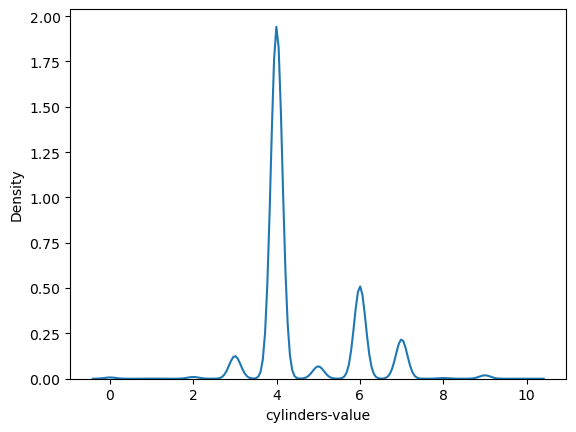

In [100]:
sns.distplot(df['cylinders-value'], hist=False, kde=True)

## Baseline

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate

In [102]:
X = df.drop(["target"], axis=1)
y = df[["target"]]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=42)

In [103]:
reg = LinearRegression().fit(train_X, train_y)

In [104]:
reg.score(train_X, train_y)

0.5004297212903728

In [105]:
mean_squared_error(reg.predict(train_X), train_y)

27379.89249419711

In [106]:
scores = cross_validate(reg, train_X, train_y, cv=3, 
                        scoring=('neg_mean_squared_error'))

In [107]:
scores

{'fit_time': array([0.01396322, 0.0154283 , 0.01060438]),
 'score_time': array([0.00597858, 0.00498271, 0.00503469]),
 'test_score': array([-27420.03367937, -27102.13281469, -27631.592227  ])}

In [108]:
mean_squared_error(reg.predict(test_X), test_y)

28619.731317799804